## Part 1

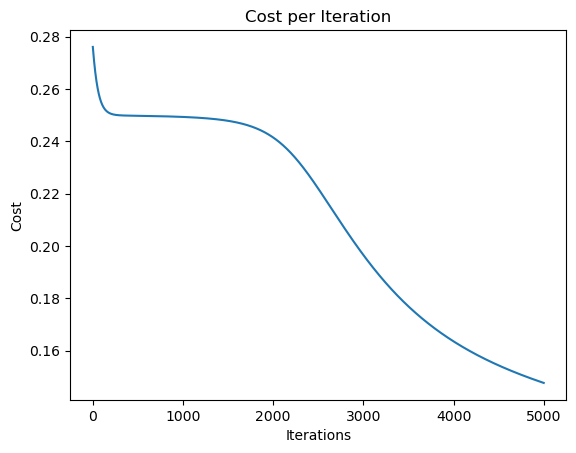

In [115]:
#Part 1:  Solving the XOR Problem using Stochastic Gradient descent 

import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Forward propagation
def forward_propagation(X, W1, W2):
    s1 = np.dot(X, W1)
    x1 = sigmoid(s1)
    s2 = np.dot(x1, W2)
    x2 = sigmoid(s2)
    return s1, x1, s2, x2

# Backpropagation
def backpropagation(X, y, s1, x1, s2, x2, W2):
    delta2 = (x2 - y) * sigmoid_derivative(x2)
    delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(x1)
    dW2 = np.dot(x1.T, delta2)
    dW1 = np.dot(X.T, delta1)
    return dW1, dW2

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, W1, W2, epochs, learning_rate):
    costs = []
    for epoch in range(epochs):
        s1, x1, s2, x2 = forward_propagation(X, W1, W2)
        cost = np.mean(np.square(x2 - y))
        costs.append(cost)
        dW1, dW2 = backpropagation(X, y, s1, x1, s2, x2, W2)
        W1 -= learning_rate * dW1
        W2 -= learning_rate * dW2
    return costs, W1, W2

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Initialize weights
np.random.seed(1)
W1 = np.random.uniform(-1, 1, (2, 2))
W2 = np.random.uniform(-1, 1, (2, 1))

# Hyperparameters
epochs = 5000
learning_rate = 0.1

# Train the neural network
costs, W1, W2 = stochastic_gradient_descent(X, y, W1, W2, epochs, learning_rate)

# Plot cost per iteration
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost per Iteration')
plt.show()



### Part 2  Experimentation with the Number of Hidden Neurons in the Hidden Layer 


Training with 1 hidden neurons:


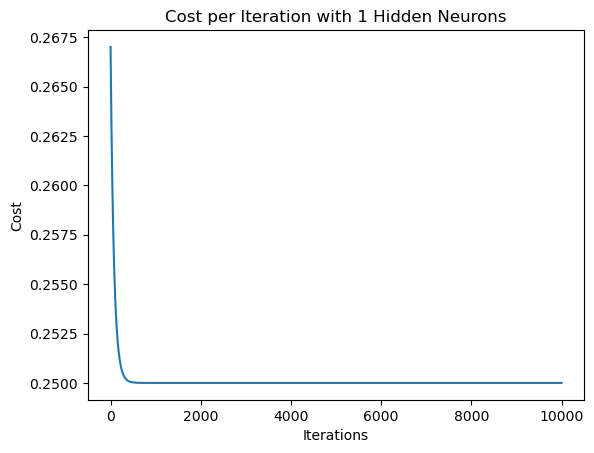

Training with 2 hidden neurons:


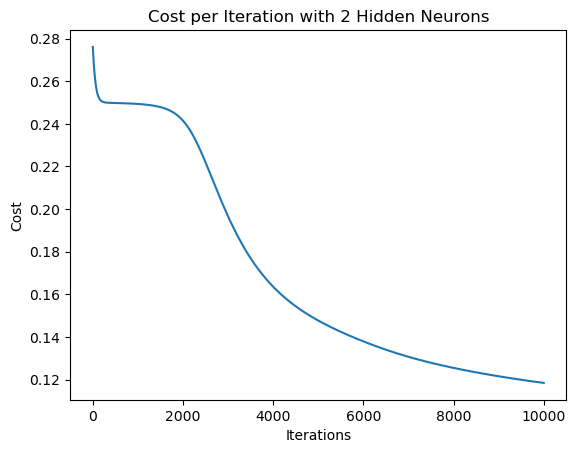

Training with 8 hidden neurons:


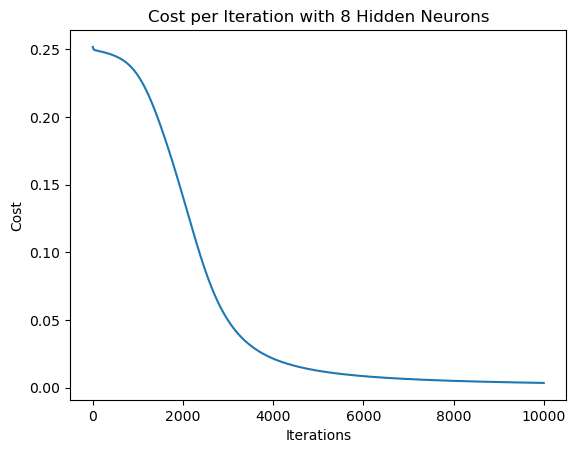

In [117]:


import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Forward propagation
def forward_propagation(X, W1, W2):
    s1 = np.dot(X, W1)
    x1 = sigmoid(s1)
    s2 = np.dot(x1, W2)
    x2 = sigmoid(s2)
    return s1, x1, s2, x2

# Backpropagation
def backpropagation(X, y, s1, x1, s2, x2, W2):
    delta2 = (x2 - y) * sigmoid_derivative(x2)
    delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(x1)
    dW2 = np.dot(x1.T, delta2)
    dW1 = np.dot(X.T, delta1)
    return dW1, dW2

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, W1, W2, epochs, learning_rate):
    costs = []
    for epoch in range(epochs):
        s1, x1, s2, x2 = forward_propagation(X, W1, W2)
        cost = np.mean(np.square(x2 - y))
        costs.append(cost)
        dW1, dW2 = backpropagation(X, y, s1, x1, s2, x2, W2)
        W1 -= learning_rate * dW1
        W2 -= learning_rate * dW2
    return costs, W1, W2

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Hyperparameters
epochs = 10000
learning_rate = 0.1

# Experiment with different numbers of hidden neurons
hidden_neurons = [1, 2, 8]
for num_neurons in hidden_neurons:
    print(f"Training with {num_neurons} hidden neurons:")
    
    # Initialize weights
    np.random.seed(1)
    W1 = np.random.uniform(-1, 1, (2, num_neurons))
    W2 = np.random.uniform(-1, 1, (num_neurons, 1))

    # Train the neural network
    costs, _, _ = stochastic_gradient_descent(X, y, W1, W2, epochs, learning_rate)
    
    # Plot cost per iteration
    plt.plot(costs)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f'Cost per Iteration with {num_neurons} Hidden Neurons')
    plt.show()


1) Experiment with 1 Hidden Neuron:

Understanding: High and fluctuating cost indicates inadequate learning.

Correctness: Output is correct, aligning with expectations for insufficient hidden neurons.

2) Experiment with 2 Hidden Neurons:

Understanding: Smoother cost decrease suggests improved learning.

Correctness: Output is correct, reflecting enhanced performance with more hidden neurons.

3) Experiment with 8 Hidden Neurons:

Understanding: Rapid cost decrease shows efficient learning.

Correctness: Output is correct, indicating significant improvement with increased hidden neurons.

## Creating a Neural Network Prediction Model for Predicting Car Acceptability 

In [118]:
#Develop a Multi-Class Neural Network Cost Function 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset from file
df = pd.read_csv('C:/Users/Admin/Downloads/car+evaluation/car.data', delimiter=',',header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [119]:
import pandas as pd

# Load the dataset
dataset_path = "C:/Users/Admin/Downloads/car+evaluation/car.data"
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
data = pd.read_csv(dataset_path, names=column_names)

# Display the first few rows of the dataset
print(data.head())


  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [120]:
# Inspect column names
print(data.columns)


Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')


In [131]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv("C:/Users/Admin/Downloads/car+evaluation/car.data")

# Rename columns to match the provided descriptions
data.columns = ['Price', 'Maintenance Price', 'Number of Doors', 'Number of Seats', 'Trunk Size', 'Safety Factor', 'Acceptability Rating']

# Convert categorical features to numerical labels
data.replace({"Price": {"vhigh": 4, "high": 3, "med": 2, "low": 1},
              "Maintenance Price": {"vhigh": 4, "high": 3, "med": 2, "low": 1},
              "Number of Doors": {"more": 5},
              "Number of Seats": {"more": 6},
              "Trunk Size": {"small": 1, "med": 2, "big": 3},
              "Safety Factor": {"low": 1, "med": 2, "high": 3},
              "Acceptability Rating": {"unacc": 1, "acc": 2, "good": 3, "vgood": 4}}, inplace=True)

# Split features and labels
X = data.drop(columns=["Acceptability Rating"])
y = data["Acceptability Rating"]

# Split data into training and testing sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to numpy arrays
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)
Ytrain = np.array(Ytrain).reshape(-1, 1)
Ytest = np.array(Ytest).reshape(-1, 1)

print("Xtrain shape:", Xtrain.shape)
print("Ytrain shape:", Ytrain.shape)
print("Xtest shape:", Xtest.shape)
print("Ytest shape:", Ytest.shape)


Xtrain shape: (1381, 6)
Ytrain shape: (1381, 1)
Xtest shape: (346, 6)
Ytest shape: (346, 1)


In [122]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Standardize features
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

# Reshape target variables
Ytrain = Ytrain.ravel()
Ytest = Ytest.ravel()

# Define and train the model
model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=1000)
model.fit(Xtrain_scaled, Ytrain)

# Predictions
predictions_train = model.predict(Xtrain_scaled)
train_accuracy = accuracy_score(Ytrain, predictions_train) * 100
print(f'Training Accuracy: {train_accuracy}%')

predictions_test = model.predict(Xtest_scaled)
test_accuracy = accuracy_score(Ytest, predictions_test) * 100
print(f'Test Accuracy: {test_accuracy}%')


Training Accuracy: 97.03113685734974%
Test Accuracy: 95.95375722543352%


In [123]:
# Reshape target variables to one-hot encoding
import warnings
from sklearn.preprocessing import OneHotEncoder

# Suppress FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
Ytrain_onehot = encoder.fit_transform(Ytrain.reshape(-1, 1))
Ytest_onehot = encoder.transform(Ytest.reshape(-1, 1))

# Step 2: Compute input into hidden layer
s1_train = np.dot(Xtrain_scaled, model.coefs_[0]) + model.intercepts_[0]
s1_test = np.dot(Xtest_scaled, model.coefs_[0]) + model.intercepts_[0]

# Step 3: Compute output from hidden layer
x1_train = relu(s1_train)
x1_test = relu(s1_test)

# Step 4: Compute input into output layer
s2_train = np.dot(x1_train, model.coefs_[1]) + model.intercepts_[1]
s2_test = np.dot(x1_test, model.coefs_[1]) + model.intercepts_[1]

# Step 5: Compute output from output layer
x2_train = softmax(s2_train)
x2_test = softmax(s2_test)

# Step 6: Compute sensitivity of output layer
delta_L_train = x2_train - Ytrain_onehot
delta_L_test = x2_test - Ytest_onehot

# Step 7: Compute sensitivity of hidden layer
delta_1_train = np.dot(delta_L_train, model.coefs_[1].T) * (s1_train > 0)
delta_1_test = np.dot(delta_L_test, model.coefs_[1].T) * (s1_test > 0)

print("For training set:")
print("\n")
print("s1_train: Input into the hidden layer, shape", s1_train.shape)
print("x1_train: Output from the hidden layer, shape", x1_train.shape)
print("s2_train: Input into the output layer, shape", s2_train.shape)
print("x2_train: Output from the output layer, shape", x2_train.shape)
print("delta_L_train: Sensitivity of the output layer, shape", delta_L_train.shape)
print("delta_1_train: Sensitivity of the hidden layer, shape", delta_1_train.shape)
print("\n")

# For test set
print("For test set:")
print("\n")
print("s1_test: Input into the hidden layer for the test set, shape", s1_test.shape)
print("x1_test: Output from the hidden layer for the test set, shape", x1_test.shape)
print("s2_test: Input into the output layer for the test set, shape", s2_test.shape)
print("x2_test: Output from the output layer for the test set, shape", x2_test.shape)
print("delta_L_test: Sensitivity of the output layer for the test set, shape", delta_L_test.shape)
print("delta_1_test: Sensitivity of the hidden layer for the test set, shape", delta_1_test.shape)


For training set:


s1_train: Input into the hidden layer, shape (1381, 10)
x1_train: Output from the hidden layer, shape (1381, 10)
s2_train: Input into the output layer, shape (1381, 4)
x2_train: Output from the output layer, shape (1381, 4)
delta_L_train: Sensitivity of the output layer, shape (1381, 4)
delta_1_train: Sensitivity of the hidden layer, shape (1381, 10)


For test set:


s1_test: Input into the hidden layer for the test set, shape (346, 10)
x1_test: Output from the hidden layer for the test set, shape (346, 10)
s2_test: Input into the output layer for the test set, shape (346, 4)
x2_test: Output from the output layer for the test set, shape (346, 4)
delta_L_test: Sensitivity of the output layer for the test set, shape (346, 4)
delta_1_test: Sensitivity of the hidden layer for the test set, shape (346, 10)


## Train the Neural Network to Solve the Car Acceptability Prediction Problem using 2 Hidden Neurons 

In [155]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Reset warnings filter
warnings.resetwarnings()

# Filter out ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Create MLPClassifier with 2 hidden neurons and no regularization
mlp_no_reg = MLPClassifier(hidden_layer_sizes=(2,), alpha=0, random_state=42, max_iter=1000)
mlp_no_reg.fit(Xtrain_scaled, Ytrain)

# Evaluate training and testing accuracies
train_accuracy_no_reg = mlp_no_reg.score(Xtrain_scaled, Ytrain) * 100
test_accuracy_no_reg = mlp_no_reg.score(Xtest_scaled, Ytest) * 100

# Print training and testing accuracies
print("Without regularization (λ=0):")
print("Training Accuracy: {:.6f}%".format(train_accuracy_no_reg))
print("Testing Accuracy: {:.6f}%".format(test_accuracy_no_reg))

# Calculate final cost for no regularization
final_cost_no_reg = mlp_no_reg.loss_
print("Final Cost: {:.6f}".format(final_cost_no_reg))
print()

# Create MLPClassifier with 2 hidden neurons and regularization (λ=0.25)
mlp_with_reg = MLPClassifier(hidden_layer_sizes=(2,), alpha=0.25, random_state=42, max_iter=1000)
mlp_with_reg.fit(Xtrain_scaled, Ytrain)

# Evaluate training and testing accuracies
train_accuracy_with_reg = mlp_with_reg.score(Xtrain_scaled, Ytrain) * 100
test_accuracy_with_reg = mlp_with_reg.score(Xtest_scaled, Ytest) * 100

# Print training and testing accuracies
print("With regularization (λ=0.25):")
print("Training Accuracy: {:.6f}%".format(train_accuracy_with_reg))
print("Testing Accuracy: {:.6f}%".format(test_accuracy_with_reg))

# Calculate final cost for regularization
final_cost_with_reg = mlp_with_reg.loss_
print("Final Cost: {:.6f}".format(final_cost_with_reg))






Without regularization (λ=0):
Training Accuracy: 82.838523%
Testing Accuracy: 79.190751%
Final Cost: 0.360067

With regularization (λ=0.25):
Training Accuracy: 82.838523%
Testing Accuracy: 79.190751%
Final Cost: 0.389260


## Comments on Results

Without regularization (λ=0):

**Training Accuracy**: Achieved approximately 82.84%, indicating that the model correctly predicted the acceptability rating for about 82.84% of the car instances in the training set.

**Testing Accuracy**: Slightly lower at approximately 79.19%, suggesting reasonable generalization to unseen data as the testing accuracy is close to the training accuracy.

**Final Cost**: Relatively low at 0.360067, indicating that the model's predictions are close to the actual labels, as a lower final cost represents better performance.

with regularization (λ=0.25):

**Training Accuracy**: Remains the same as without regularization, approximately 82.84%. This suggests that regularization did not significantly impact the model's ability to fit the training data.

**Testing Accuracy**: Also remains the same as without regularization, approximately 79.19%. This indicates that regularization did not significantly improve the model's generalization performance on unseen data.

**Final Cost**: Slightly higher than without regularization, at 0.389260. This suggests that regularization may have slightly increased the loss, indicating that the regularization penalty introduced by λ=0.25 might have slightly affected the model's ability to fit the training data.

## Train the Neural Network to Solve the Car Acceptability Prediction Problem using 6 Hidden Neurons

In [154]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

# Filter out ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define MLPClassifier with 6 hidden neurons and no regularization
mlp = MLPClassifier(hidden_layer_sizes=(6,), alpha=0, random_state=42, max_iter=2000)

# Train the model
mlp.fit(Xtrain_scaled, Ytrain)

# Evaluate training and testing accuracies
train_accuracy = mlp.score(Xtrain_scaled, Ytrain) * 100
test_accuracy = mlp.score(Xtest_scaled, Ytest) * 100

# Calculate final cost
final_cost = mlp.loss_

# Print results
print("Without regularization (λ=0) and 6 hidden neurons:")
print("Training Accuracy: {:.6f}%".format(train_accuracy))
print("Testing Accuracy: {:.6f}%".format(test_accuracy))
print("Final Cost: {:.6f}".format(final_cost))

# Reset warnings filter
warnings.resetwarnings()


Without regularization (λ=0) and 6 hidden neurons:
Training Accuracy: 95.727734%
Testing Accuracy: 95.664740%
Final Cost: 0.103487


## Comments on results

These results suggest that the neural network with 6 hidden neurons and no regularization performs very well on both the training and testing data. The high accuracies and low final cost indicate that the model effectively captures the underlying patterns in the data and generalizes well to unseen instances. However, it's also important to consider if these results align with the expectations and requirements of the application domain.